In [16]:
import numpy as np
import matplotlib.pyplot as plt

def generic_simmetric(n, seed = 23):
    """
    Return generic simmetric matrix of size nxn
    """
    np.random.seed(seed)
    A = np.random.random((n,n))
    A = (A + A.T)/2
    return A

def generic_state(n, seed = 21):
    """
    Return generic normalized state of length n
    """
    v = np.random.random(n)
    return v / np.sqrt(np.sum(v**2))

def energy_check(ham, phi):
    """
    Given a normalized state and hamiltonian compute energy
    """
    out = np.matmul(ham, phi)
    return np.dot(phi, out)
    
def lanczos_step(ham, K, phi_0):
    """
    Given a simmetric hamiltonian, a simmetric operator, and an initial guess of the ground state produce 
    the next state in the lanczos routine 
    """
    t_phi_1 = np.matmul(K,phi_0)
    s_phi_1 = t_phi_1 - np.dot(phi_0, t_phi_1) * phi_0
    phi_1 = s_phi_1/np.sqrt(np.sum(s_phi_1**2)) 
    H = np.zeros((2,2))
    out_0 = np.matmul(ham, phi_0)
    out_1 = np.matmul(ham, phi_1)
    H[0, 0] = np.dot(phi_0, out_0)
    H[0, 1] = np.dot(phi_0, out_1)
    H[1, 0] = np.dot(phi_1, out_0)
    H[1, 1] = np.dot(phi_1, out_1)
    eig, eig_vec = np.linalg.eig(H)
    coeff = eig_vec[:, np.argmin(eig)]
    final = coeff[0] * phi_0 + coeff[1] * phi_1 
    if(final[0]<0):
        final = - final
    return final

def lanczos(ham, precision = 10**(-6), seed = 12):
    """
    Given a simmetric matrix ham return the ground state
    """
    np.random.seed(seed)
    phi_old = generic_state(ham.shape[0], seed)
    phi_next = generic_state(ham.shape[0])
    while(np.sum(np.abs(phi_old-phi_next)) > precision):
        phi_old = phi_next
        phi_next = lanczos_step(ham, ham, phi_next)
    return phi_next

ham = generic_simmetric(3, seed=9)
real_eig, _ = np.linalg.eig(ham)
found_vec = lanczos(ham)
found_eig = energy_check(ham,found_vec)
print('real ground_state = {:.10f}'.format(np.min(real_eig)))
print('Found eig = {:.10f}'.format(found_eig))


real ground_state = -0.4253814624
Found eig = -0.4253814624


In [20]:
def lanczos_history(ham, precision = 10**(-6), seed = 12):
    """
    Given a simmetric matrix ham return the ground state and energy history
    """
    energy_history = []
    np.random.seed(seed)
    phi_old = generic_state(ham.shape[0], seed)
    phi_next = generic_state(ham.shape[0])
    while(np.sum(np.abs(phi_old-phi_next)) > precision):
        phi_old = phi_next
        phi_next = lanczos_step(ham, ham, phi_next)
        energy_history.append(energy_check(ham, phi_next))
    return energy_history

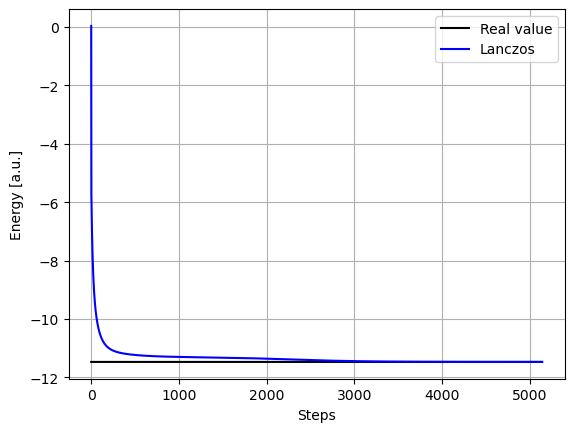

In [31]:
ham = generic_simmetric(800)

eig, _ = np.linalg.eig(ham)
real = np.min(eig)

history = lanczos_history(ham, precision = 10**(-3), seed = 12)
steps = np.arange(len(history))
real_y = real * np.ones(len(history))

fig, ax = plt.subplots()
ax.plot(steps, real_y, c='black', markersize=0.2, label='Real value')
ax.plot(steps, history, c='blue', markersize=0.2, label='Lanczos')
ax.set_xlabel('Steps')
ax.set_ylabel('Energy [a.u.]')
ax.grid()
ax.legend()
plt.show()